In [1]:
cd ../src

/home/richard/Desktop/software/epicluster-results_upload/epicluster-results/src


In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import scipy.stats
import branchpro
import epicluster as ec

In [3]:
random.seed(123)
np.random.seed(123)

In [4]:
# serial interval
serial_interval = pd.read_csv("../data/raw/covid_serial_interval.csv")
w = serial_interval['w']
w = w[:20]
w = w / sum(w)

# data
data = pd.read_csv("../data/synthetic/synthetic1_dropoff.csv")
Rt_series = np.asarray(data['Rt'])
cases = np.asarray(data['cases'])

past_cases = np.zeros(len(w))
past_cases[-1] = 5
past_cases[-2] = 5
past_cases[-3] = 5

inf_cases = np.concatenate([past_cases, cases])


# run branchpro
a = 1
b = 5

inc_data = pd.DataFrame(
    {
        'Time': np.arange(len(inf_cases)),
        'Incidence Number': inf_cases
    }
)

inference = branchpro.BranchProPosterior(
    inc_data=inc_data,
    daily_serial_interval=w,
    alpha=a,
    beta=1/b)

inference.run_inference(tau=7)
intervals7 = inference.get_intervals(central_prob=.9)

inference.run_inference(tau=28)
intervals28 = inference.get_intervals(central_prob=.9)


# run change point
p = ec.PoissonModel(copy.deepcopy(inf_cases), w, prior_expected_clusters=1.5)
mcmc = ec.MCMCSampler(p, 2)
phi_chain, z_chain, counts = mcmc.run_mcmc(Rhat_thresh=1.01, progress=True)

# load epifilter
epi_results = pd.read_csv('../data/synthetic/results/synthetic_1_R.csv')

# save results
results_synth1 = cases, Rt_series, w, phi_chain, z_chain, intervals7, intervals28, epi_results

Iter=50, Rhat=23.7682451147303
Iter=100, Rhat=14.005693295423345
Iter=150, Rhat=6.191080665225397
Iter=200, Rhat=3.8951473914858092
Iter=250, Rhat=2.8803448978028334
Iter=300, Rhat=1.4947566746085013
Iter=350, Rhat=1.13820419707788
Iter=400, Rhat=1.0139887155571425
Iter=450, Rhat=1.0184404087767804
Iter=500, Rhat=1.0199893750050306
Iter=550, Rhat=1.0023494556391233
Converged 550 1.0023494556391233


In [5]:
# serial interval
w = scipy.stats.gamma(2.707, scale=1/0.177)
w = w.pdf(np.arange(50))
w = w / sum(w)


# data
data = pd.read_csv("../data/synthetic/synthetic2_resurgence.csv")
Rt_series = np.asarray(data['Rt'])
cases = np.asarray(data['cases'])

past_cases = np.ones(len(w)) * 5
inf_cases = np.concatenate([past_cases, cases])



# run branchpro
a = 1
b = 5

inc_data = pd.DataFrame(
    {
        'Time': np.arange(len(inf_cases)),
        'Incidence Number': inf_cases
    }
)

inference = branchpro.BranchProPosterior(
    inc_data=inc_data,
    daily_serial_interval=w,
    alpha=a,
    beta=1/b)

inference.run_inference(tau=7)
intervals7 = inference.get_intervals(central_prob=.9)

inference.run_inference(tau=28)
intervals28 = inference.get_intervals(central_prob=.9)


# run change point
p = ec.PoissonModel(copy.deepcopy(inf_cases), w, prior_expected_clusters=1.5)
mcmc = ec.MCMCSampler(p, 2)
phi_chain, z_chain, counts = mcmc.run_mcmc(Rhat_thresh=1.01, progress=True)


# load epifilter
epi_results = pd.read_csv('../data/synthetic/results/synthetic_2_R.csv')



# save results
results_synth2 = cases, Rt_series, w, phi_chain, z_chain, intervals7, intervals28, epi_results

Iter=50, Rhat=111.54724291337193
Iter=100, Rhat=48.47312315855494
Iter=150, Rhat=32.21647233092333
Iter=200, Rhat=26.04490354001549
Iter=250, Rhat=16.274255445520307
Iter=300, Rhat=16.041093766624922
Iter=350, Rhat=11.67568039752907
Iter=400, Rhat=8.838325912062535
Iter=450, Rhat=7.5766167196410565
Iter=500, Rhat=6.248845673585692
Iter=550, Rhat=4.670929481730928
Iter=600, Rhat=3.7231254474090583
Iter=650, Rhat=3.255023080561887
Iter=700, Rhat=3.241708445546628
Iter=750, Rhat=2.9258651267889215
Iter=800, Rhat=2.274508686917524
Iter=850, Rhat=1.7441118221623284
Iter=900, Rhat=1.4875408766614924
Iter=950, Rhat=1.3321050428150312
Iter=1000, Rhat=1.2298777455876615
Iter=1050, Rhat=1.1522900529904183
Iter=1100, Rhat=1.0953390689160554
Iter=1150, Rhat=1.0542308600154102
Iter=1200, Rhat=1.0148504381765227
Iter=1250, Rhat=1.0286795367169215
Iter=1300, Rhat=1.0217218670051187
Iter=1350, Rhat=1.0238265543848322
Iter=1400, Rhat=1.0223634181101449
Iter=1450, Rhat=1.0151106786458066
Iter=1500, Rhat

In [6]:
# serial interval
serial_interval = pd.read_csv("../data/raw/covid_serial_interval.csv")
w = serial_interval['w']
w = w[:20]
w = w / sum(w)


# data
data = pd.read_csv("../data/synthetic/synthetic3_slowdropoff.csv")
Rt_series = np.asarray(data['Rt'])
cases = np.asarray(data['cases'])

past_cases = np.ones(len(w)) * 5
inf_cases = np.concatenate([past_cases, cases])



# run branchpro
a = 1
b = 5

inc_data = pd.DataFrame(
    {
        'Time': np.arange(len(inf_cases)),
        'Incidence Number': inf_cases
    }
)

inference = branchpro.BranchProPosterior(
    inc_data=inc_data,
    daily_serial_interval=w,
    alpha=a,
    beta=1/b)

inference.run_inference(tau=7)
intervals7 = inference.get_intervals(central_prob=.9)

inference.run_inference(tau=28)
intervals28 = inference.get_intervals(central_prob=.9)


# run change point
p = ec.PoissonModel(copy.deepcopy(inf_cases), w, prior_expected_clusters=1.5)
mcmc = ec.MCMCSampler(p, 2)
phi_chain, z_chain, counts = mcmc.run_mcmc(Rhat_thresh=1.01, progress=True)


# load epifilter
epi_results = pd.read_csv('../data/synthetic/results/synthetic_3_R.csv')


# save results
results_synth3 = cases, Rt_series, w, phi_chain, z_chain, intervals7, intervals28, epi_results

Iter=50, Rhat=20.838481280885862
Iter=100, Rhat=7.108898894822019
Iter=150, Rhat=3.2209356649392844
Iter=200, Rhat=2.106040023835446
Iter=250, Rhat=1.2900074687446428
Iter=300, Rhat=1.1111826718951976
Iter=350, Rhat=1.0490110992158859
Iter=400, Rhat=1.265617310243932
Iter=450, Rhat=1.1890088518029531
Iter=500, Rhat=1.0118611936947413
Iter=550, Rhat=1.0122308642963092
Iter=600, Rhat=1.1070909685538894
Iter=650, Rhat=1.1253075606204714
Iter=700, Rhat=1.1160672975483596
Iter=750, Rhat=1.039904458875353
Iter=800, Rhat=1.0154423783072344
Iter=850, Rhat=1.03400289182759
Iter=900, Rhat=1.0672904829049652
Iter=950, Rhat=1.0895231093177091
Iter=1000, Rhat=1.0501743525475564
Iter=1050, Rhat=1.0284491983386752
Iter=1100, Rhat=1.0202294129609089
Iter=1150, Rhat=1.053632634396559
Iter=1200, Rhat=1.0624970911623814
Iter=1250, Rhat=1.039518874552794
Iter=1300, Rhat=1.025824419702356
Iter=1350, Rhat=1.0124285969987759
Iter=1400, Rhat=1.0251342760772955
Iter=1450, Rhat=1.0332882385679891
Iter=1500, Rha

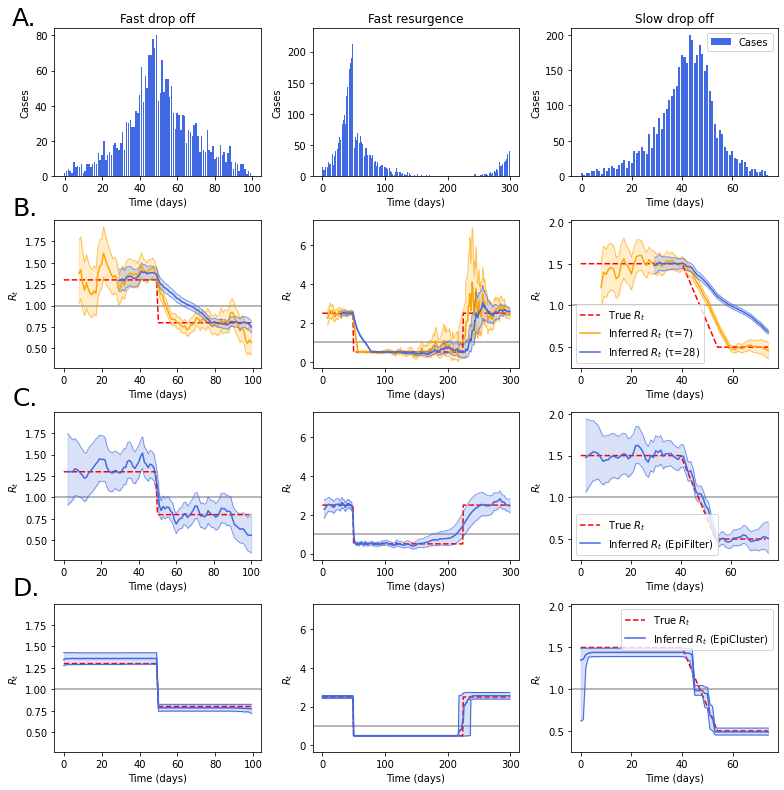

In [7]:
fig = plt.figure(figsize=(11,11))

num_exps = 3

for i in range(num_exps):
    
    do_legend = i==num_exps-1
    
    if i == 0:
        cases, Rt_series, w, phi_chain, z_chain, intervals7, intervals28, epi_results = results_synth1
    elif i == 1:
        cases, Rt_series, w, phi_chain, z_chain, intervals7, intervals28, epi_results = results_synth2
    elif i == 2:
        cases, Rt_series, w, phi_chain, z_chain, intervals7, intervals28, epi_results = results_synth3
        
    ax = fig.add_subplot(4, num_exps, 1+i)

    x = np.arange(len(cases))
    ax.bar(x, cases, label='Cases', color='royalblue')
    ax.set_title('Fast drop off' if i == 0 else 'Fast resurgence' if i == 1 else 'Slow drop off')

    
    if do_legend:
        ax.legend()
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Cases')

    ax = fig.add_subplot(4, num_exps, 3*num_exps+i+1)
    Rs = []
    num_mcmc = len(z_chain)
    for phi, z in zip(phi_chain[num_mcmc//4:], z_chain[num_mcmc//4:]):
        Rs.append([phi[zi] for zi in z])
    ax.plot(x, Rt_series, color='red', label='True $R_t$', ls='--')
    ax.plot(x, np.mean(Rs, axis=0), color='royalblue', label='Inferred $R_t$ (EpiCluster)')
    ax.fill_between(x, np.percentile(Rs, 5, axis=0), np.percentile(Rs, 95, axis=0), color='royalblue', alpha=0.2)
    ax.plot(x, np.percentile(Rs, 5, axis=0), color='royalblue', lw=1)
    ax.plot(x, np.percentile(Rs, 95, axis=0), color='royalblue', lw=1)
    
    ax.axhline(1, color='gray', alpha=0.75, zorder=-10)

    if do_legend:
        ax.legend(loc='upper right')
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('$R_t$')

    ax = fig.add_subplot(4, num_exps, num_exps+i+1, sharey=ax)
    x = np.arange(len(w), len(cases))
    x = np.arange(len(cases))
    ax.plot(x, Rt_series, color='red', label='True $R_t$', ls='--')

    x = np.arange(8, len(cases))
    ax.plot(x, intervals7['Mean'][len(w):], color='orange', label='Inferred $R_t$ (τ=7)')
    ax.fill_between(x, intervals7['Lower bound CI'][len(w):], intervals7['Upper bound CI'][len(w):], alpha=0.2, color='orange')
    ax.plot(x, intervals7['Lower bound CI'][len(w):], color='orange', lw=0.5)
    ax.plot(x, intervals7['Upper bound CI'][len(w):], color='orange', lw=0.5)
    
    x = np.arange(29, len(cases))
    ax.plot(x, intervals28['Mean'][len(w):], color='royalblue', label='Inferred $R_t$ (τ=28)')
    ax.fill_between(x, intervals28['Lower bound CI'][len(w):], intervals28['Upper bound CI'][len(w):], alpha=0.2, color='royalblue')
    ax.plot(x, intervals28['Lower bound CI'][len(w):], color='royalblue', lw=0.5)
    ax.plot(x, intervals28['Upper bound CI'][len(w):], color='royalblue', lw=0.5)
    
    ax.axhline(1, color='gray', alpha=0.75, zorder=-10)

     
    if do_legend:
        ax.legend()
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('$R_t$')
    
    
    
    ax = fig.add_subplot(4, num_exps, 2*num_exps+i+1, sharey=ax)
    
    x = np.arange(len(w), len(cases))
    x = np.arange(len(cases))
    ax.plot(x, Rt_series, color='red', label='True $R_t$', ls='--')


    x = epi_results['day'][1:]
    mean = epi_results['R_smooth'][1:]
    lb = epi_results['R_smooth_lower_bound'][1:]
    ub = epi_results['R_smooth_upper_bound'][1:]
    ax.plot(x, mean, color='royalblue', label='Inferred $R_t$ (EpiFilter)')
    ax.fill_between(x, lb, ub, alpha=0.2, color='royalblue')
    ax.plot(x, lb, color='royalblue', lw=0.5)
    ax.plot(x, ub, color='royalblue', lw=0.5)  
    
    ax.axhline(1, color='gray', alpha=0.75, zorder=-10)
    
    
    if do_legend:
        ax.legend()
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('$R_t$')
    

fig.set_tight_layout(True)

plt.subplots_adjust(left=0.2)
fig.text(.02, .97, 'A.', fontsize=25)
fig.text(.02, .73, 'B.', fontsize=25)
fig.text(.02, .49, 'C.', fontsize=25)
fig.text(.02, .25, 'D.', fontsize=25)


plt.savefig('../notebooks/Figure2.pdf')
plt.show()
